## Measures of Association I

In [51]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from statsmodels.stats.power import TTestPower

#### Parametric Exercises
Let's examine the relationship between these two measured variables:
Wing length|Tail length
:-:|:-:
10.4|7.4
10.8| 7.6
11.1|7.9
10.2|7.2
10.3|7.4
10.2|7.1
10.7|7.4
10.5|7.2
10.8|7.8
11.2|7.7
10.6|7.8
11.4|8.3

Assume Wing length is the X variable and Tail Length is the Y variable, both measured in cm.

**1. Plot X vs Y. Do they look related?**

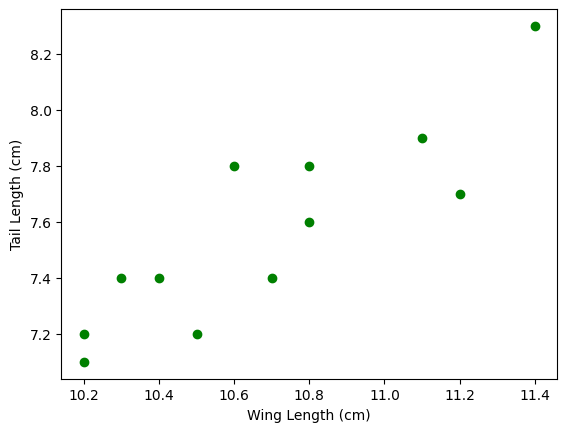

In [35]:
#define dataset
wing=[10.4, 10.8, 11.1, 10.2, 10.3, 10.2, 10.7, 10.5, 10.8, 11.2, 10.6, 11.4]
tail=[7.4, 7.6, 7.9, 7.2, 7.4, 7.1, 7.4, 7.2, 7.8, 7.7, 7.8, 8.3]

#plot
plt.scatter(wing, tail, color='green')
plt.xlabel('Wing Length (cm)')
plt.ylabel('Tail Length (cm)')
plt.show()

In [36]:
# Based on the plot above, these variables do look to be positively correlated.

**2. Calculate r<sub>X,Y</sub> and r<sub>Y,X</sub>, first using the equations above and then using either the Python numpy function corrcoef or Matlab's built-in corrcoef. Did you get the same answers?**

In [37]:
#calculated
x_bar=np.mean(wing)
y_bar=np.mean(tail)
num=np.sum((wing-x_bar)*(tail-y_bar))
denom=np.sqrt(np.sum((wing-x_bar)**2))*np.sqrt(np.sum((tail-y_bar)**2))
rxy=num/denom
print(f"Calculated rx,y = ry,x = {rxy:.3f}")

#function
r_funct=np.corrcoef(wing, tail)
r=r_funct[0,1]
print(f"Function rx,y = ry,x = {r:.3f}")

Calculated rx,y = ry,x = 0.870
Function rx,y = ry,x = 0.870


**3. What is the standard error of r<sub>X,Y</sub>? The 95% confidence intervals computed from the standard error?**

In [39]:
#stardard error
n=np.size(wing)
se=np.sqrt((1-(r**2))/(n-2)) #from function in notebook

#get 95% CI
## fisher's z-transformation of r:
z=0.5 * np.log((1+r)/(1-r))

## compute its SD:
sz=np.sqrt(1/(n-3))

## compute CI's in z-space:
z_crit=st.norm.ppf((1-0.95)/2) #2 tailed
z_lower=z+(z_crit*sz)
z_upper=z-(z_crit*sz)

## transform z's back
ci_lower=(np.exp(2*z_lower)-1)/(np.exp(2*z_lower)+1)
ci_upper=(np.exp(2*z_upper)-1)/(np.exp(2*z_upper)+1)

print(f"SE of r={se:.3f}, 95% CI from {ci_lower:.2f} to {ci_upper:.3f}")

SE of r=0.156, 95% CI from 0.59 to 0.963


**4. Should the value of r<sub>X,Y</sub> be considered significant at the p < 0.05 level, given a two-tailed test (i.e., we reject if the test statistic is too large on either tail of the null distribution) for H<sub>0</sub>:r<sub>X,Y</sub>=0?**

In [42]:
t=r/se
p_t=2*(st.t.sf(t, n-2)) #doubling b/c st.t.sf assumes 1-tailed
print(f"p={p_t:.5f}")

p=0.00023


**5. Yale does the exact same study and finds that his correlation value is 0.75. Is this the same as yours? That is, evaluate H<sub>0</sub>:r<sub>X,Y</sub>=0.75?**

In [48]:
#z-tranform
z_rs=0.5 * np.log((1+0.75)/(1-0.75))

#get test-statistic
lamb=(z-z_rs)/np.sqrt(1/(n-3))

#test
p_2=2*(st.norm.sf(lamb))
print(f"p={p_2:.5f}")

p=0.27803


**6. Finally, calculate the statistical power and sample size needed to reject H<sub>0</sub>:r=0 when r >= 0.5.**

In [114]:
#z-score r_alt=0.5
z_alt=0.5 * np.log((1+0.5)/(1-0.5))

#i think effect size is z-scored r_alt - r_h0=0

power=TTestPower().power(z_alt, n, 0.05, df=n-2) 
print(f"power={power:.5f} when r>= 0.5 and n={n}")

#now solve for sample size
samp=TTestPower().solve_power(effect_size=z_alt, nobs=None, alpha=0.05, power=0.8, alternative="two-sided") 
print(f"Sample size={samp:.1f} when r>= 0.5 and power=0.8")

power=0.40550 when r>= 0.5 and n=12
Sample size=28.0 when r>= 0.5 and power=0.8
